$$\newcommand{\nr}[1]{\|#1\|}
\newcommand{\Rsp}{\mathbb{R}}$$
# TP 2: Méthode des différences finies pour $-u'' = f$


## Exercice 1. Ordre de convergence avec conditions au bord de Dirichlet

On approche le problème $-u''=f$ avec conditions de Dirichlet : 

$$
\left\{\begin{aligned}
&-u''(x) = f(x) \hbox{ sur } ]0,1[ \\
&u(0) = u(1) = 0
\end{aligned}\right.$$

par le système linéaire de dimension finie 

$$
\left\{\begin{aligned}
&-\frac{1}{h}(u_{i-1} - 2 u_i + u_{i+1}) = f_i \hbox{ pour } 1\leq i\leq N\\
&u_{0} = 0, u_{n+1} = 0 
\end{aligned}\right.,$$

où $h = 1/(N+1)$ et $x_j = \tau j$ pour $0\leq j\leq N$ et $f_j = f(t_j)$. 

**Q1:** On considère $f(x) = (2\pi)^2 \sin(2\pi x)$, de sorte que la solution de l'équation est donnée par $u(x) = \sin(2\pi x)$. Illustrer numériquement le fait que la méthode des différences finies est d'ordre $2$ pour ce problème.

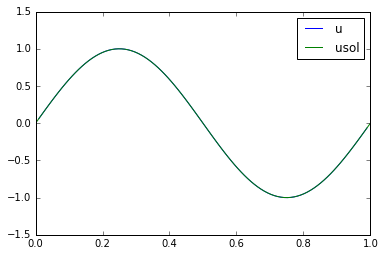

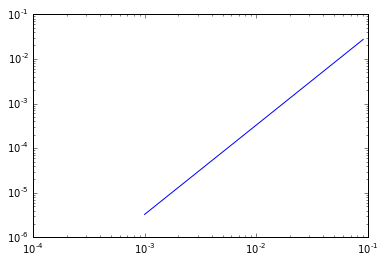

In [68]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Laplacien avec conditions de Dirichlet
def D(n):
    tau = 1.0/(n+1)
    A = np.zeros((n,n))
    for i in xrange(n):
        A[i,i] = -2
    for i in xrange(n-1):
        A[i,i+1] = 1
        A[i+1,i] = 1
    return -A/(tau*tau)


## Dirichlet
n=100
t = np.linspace(0,1,n+2)
usol = np.sin(2*np.pi*t)
v = (2*np.pi)**2*usol

u = np.linalg.solve(D(n), v[1:-1])
plt.plot(t[1:-1], u, label='u')
plt.plot(t, usol, label='usol')
plt.legend()



E = []
H = []
for n in [10,100,500,1000]:
    t = np.linspace(0,1,n+2)
    usol = np.sin(2*np.pi*t)
    v = (2*np.pi)**2*usol
    u = np.linalg.solve(D(n), v[1:-1])
    H.append(1.0/(n+1))
    E.append(np.max(np.abs(u-usol[1:-1])))

plt.figure(2)
plt.loglog(H,E)


## Exercice 2. Traitement de conditions au bord de Neumann

On approche le problème $-u'' + u=f$ avec conditions de Neumann : 

$$
\left\{\begin{aligned}
&-u''(x) + u(x) = f(t) \hbox{ sur } ]0,1[ \\
&u'(0) = u'(1) = 0
\end{aligned}\right.$$

par le système linéaire de dimension finie 

$$
\left\{\begin{aligned}
&\frac{u_{1} - u_0}{h} = 0, \frac{u_{N+1} - u_N}{h} = 0 \\
&\frac{1}{h}(u_{i-1} - 2 u_i + u_{i+1}) = f_i \hbox{ pour } 1\leq i\leq N
\end{aligned}\right.,$$

où $h = 1/(N+1)$ et $x_j = \tau j$ pour $0\leq j\leq N+1$ et $f_j = f(t_j)$.

Le problème discret peut être écrit sous la forme $A U = F$ où $A$ est une matrice de taille $N\times N$, où $U = (u_1,\dots,u_{N}) \in\Rsp^N$, et où $F = (f_1,\dots,f_N)$.

**Q1.**  Montrer que si $V\in \Rsp^{N}$ vérifie $A V = G$, alors 
$\nr{V}_\infty \leq \nr{G}_\infty$, où $\nr{G}_\infty = \max_{i} |G_i|.$ En déduire que $A$ est inversible. *(Indication: considérer l'indice $i_0$ réalisant le maximum dans la définition de $\nr{V}_\infty$, et démontrer que $V_{i_0} \leq F_{i_0} \leq \nr{F}_\infty$.)*

**Q2.** Montrer que si $u\in C^3([0,1])$ est solution du problème continu, et si l'on pose $\bar{U} = (u(x_1),\dots, u(x_{N}$, alors $\nr{A \bar{U} - F}_\infty \leq C h$ où $C$ ne dépend que de $u$ (et pas de $h$).

**Q3.** En déduire que si $U$ vérifie $A U = F$, alors $\nr{U - \bar{U}}_\infty \leq Ch$.

**Q4.** En prenant $f(x) = ((2\pi)^2 + 1) \cos(2\pi x)$ (soit $u(x) = \cos(2\pi x)$), montrer que la convergence est d'ordre $1$ mais pas $2$.

40.3893004212
60.1221440614
40.4001160373


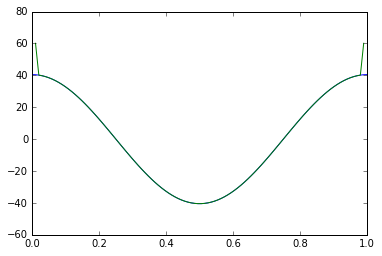

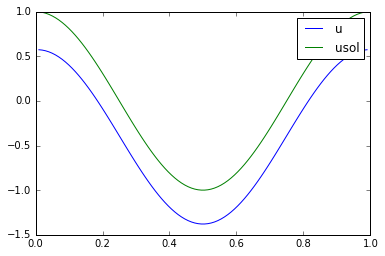

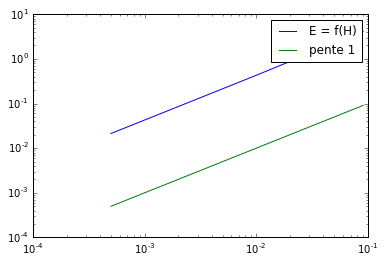

In [70]:
## Discrétisation de -u''+u avec conditions de Neumann
def N(n):
    tau = 1.0/(n+1)
    A = np.zeros((n,n))
    for i in xrange(n):
        A[i,i] = -2
    for i in xrange(n-1):
        A[i,i+1] = 1
        A[i+1,i] = 1
    A[0,0]=-1
    A[n-1,n-1]=-1
    return -A/(tau*tau) + np.eye(n)

n=100
h=1./(n+1)
t = np.linspace(0,1,n+2)
usol = np.cos(2*np.pi*t)
v = ((2*np.pi)**2+1)*usol
plt.plot(t, v, label='v')
plt.plot(t[1:-1], np.dot(N(n),usol[1:-1]), label='N(n)*usol')

print(-(usol[2]-2*usol[1]+usol[0])/(h**2) + u[1])
print(-(usol[2]-usol[1])/(h**2) + u[1])
print(v[1])

plt.figure()
u = np.linalg.solve(N(n), v[1:-1])
plt.plot(t[1:-1], u, label='u')
plt.plot(t, usol, label='usol')
plt.legend()

E = []
H = []
for n in [10,100,500,1000,2000]:
    t = np.linspace(0,1,n+2)
    usol = np.cos(2*np.pi*t)
    v = ((2*np.pi)**2+1)*usol
    u = np.linalg.solve(N(n), v[1:-1])
    H.append(1.0/(n+1))
    E.append(np.max(np.abs(u-usol[1:-1])))
H = np.array(H)
E = np.array(E)
plt.figure()
plt.loglog(H,E,label='E = f(H)')
plt.loglog(H,H,label='pente 1')
plt.legend()

## Exercice 3. Conditions non homogènes.

On approche le problème $-u''=f$ avec conditions de Dirichlet non-homogènes : 

$$
\left\{\begin{aligned}
&-u''(x) = f(x) \hbox{ sur } ]0,1[ \\
&u(0) = a, u(1) = b,
\end{aligned}\right.$$

où $a,b\in\Rsp$, par le système linéaire de dimension finie 

$$
\left\{\begin{aligned}
&-\frac{1}{h}(u_{i-1} - 2 u_i + u_{i+1}) = f_i \hbox{ pour } 1\leq i\leq N \\
&u_{0} = a, u_{n+1} = b 
\end{aligned}\right.,$$

où $h = 1/(n+1)$ et $x_j = \tau j$ pour $0\leq j\leq n$ et $f_j = f(t_j)$. 

**Q1** Mettre ce système sous la forme $A U = F+\Delta$ où $A$ est la discrétisation habituelle de l'opérateur $u\mapsto -u''$ (de taille $N\times N$) et où $\Delta \in\Rsp^N$ est un vecteur à déterminer.

**Q2** Vérifier que dans ce cas aussi la convergence est d'ordre $2$ dans le cas $a=1, b=0, f = (3\pi/2)^2 \cos\left(\frac{3\pi}{2} x\right)$ dont la solution est $x \mapsto \cos\left(\frac{3\pi}{2} x\right)$. Justifier cet ordre de convergence.

In [ ]:
## Dirichlet non homogène
n=100
t = np.linspace(0,1,n+2)
usol = np.cos(1.5*np.pi*t)
v = (1.5*np.pi)**2*usol
h = 1.0/(n+1)
vv = v[1:-1]
vv[0] += 1.0/(h*h)

u = np.linalg.solve(D(n), vv)
plt.plot(t[1:-1], u, label='u')
plt.plot(t, usol, label='usol')
plt.legend()

E = []
H = []
for n in [10,100,500,1000]:
    t = np.linspace(0,1,n+2)
    usol = np.cos(1.5*np.pi*t)
    v = (1.5*np.pi)**2*usol
    h = 1.0/(n+1)
    vv = v[1:-1]
    vv[0] += 1.0/(h*h)
    u = np.linalg.solve(D(n), vv)
    H.append(1.0/(n+1))
    E.append(np.max(np.abs(u-usol[1:-1])))

plt.figure()
H = np.array(H)
E = np.array(E)
plt.loglog(H,E,label='E = f(H)')
plt.loglog(H,H*H,label='pente 2')
plt.legend()


## Exercice 4. Méthode d'ordre 2 pour les conditions de Neumann

On considère à nouveau le problème $-u'' + u=f$ avec conditions de Neumann : 

$$
\left\{\begin{aligned}
&-u''(x) + u(x) = f(t) \hbox{ sur } ]0,1[ \\
&u'(0) = u'(1) = 0
\end{aligned}\right.$$

**Q1** En partant de l'égalité
$ u(h) = u(0) + hu'(0) + \frac{h^2}{2} u''(0) + O(h^3), $
réécrite sous la forme
$$
\begin{align*}
u'(0) &= \frac{1}{h} (u(h) - u(0) - \frac{h}{2} u''(0)) + O(h^2) \\
&= \frac{1}{h} (u(h) - u(0)) - \frac{h}{2} (f(0) - u(0))  + O(h^2) 
\end{align*}
$$
proposer une discrétisation d'ordre deux pour la condition $u'(0) = 0$. Mettre le schéma sous la forme $AU = F + \Delta$ où $A$ (taille $N\times N$) et $\Delta\in\Rsp^N$ sont à déterminer.

**Q2** Vérifier numériquement qu'on obtient effectivement un ordre $2$.

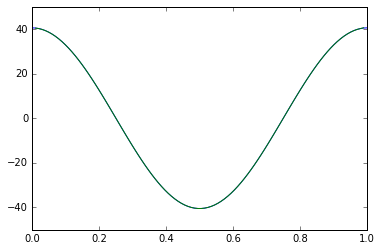

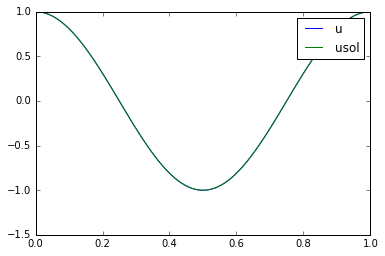

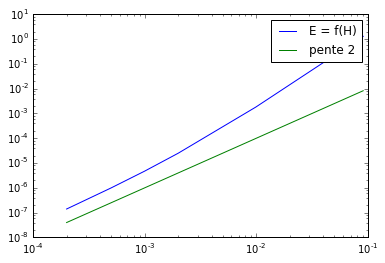

In [77]:
## Discrétisation de -u''+u avec conditions de Neumann
def Nf(n,f):
    tau = 1.0/(n+1)
    A = np.zeros((n,n))
    for i in xrange(n):
        A[i,i] = -2
    for i in xrange(n-1):
        A[i,i+1] = 1
        A[i+1,i] = 1
    A[0,0]=-1
    A[n-1,n-1]=-1
    A = -A/(tau*tau) + np.eye(n)
    A[0,0] += .5
    A[n-1,n-1] += .5
    Delta = np.zeros(n)
    Delta[0] = f[0]/2
    Delta[n-1] = f[n-1]/2
    return A,Delta

n=100
h=1./(n+1)
t = np.linspace(0,1,n+2)
usol = np.cos(2*np.pi*t)
f = ((2*np.pi)**2+1)*usol
A,Delta = Nf(n,f)
plt.plot(t, f, label='v')
plt.plot(t[1:-1], np.dot(A,usol[1:-1])-Delta, label='N(n)*usol')


plt.figure()
u = np.linalg.solve(A, f[1:-1]+Delta)
plt.plot(t[1:-1], u, label='u')
plt.plot(t, usol, label='usol')
plt.legend()

E = []
H = []
for n in [10,100,500,1000,2000,5000]:
    t = np.linspace(0,1,n+2)
    usol = np.cos(2*np.pi*t)
    f = ((2*np.pi)**2+1)*usol
    A,Delta = Nf(n,f)
    u = np.linalg.solve(A, f[1:-1]+Delta)
    H.append(1.0/(n+1))
    E.append(np.max(np.abs(u-usol[1:-1])))
H = np.array(H)
E = np.array(E)
plt.figure()
plt.loglog(H,E,label='E = f(H)')
plt.loglog(H,H*H,label='pente 2')
plt.legend()